In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
x= np.array(df[['YearsExperience']])

In [6]:
y=np.array(df['Salary'])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=9014)

In [9]:
y_test

array([ 54445., 101302.,  43525.,  63218., 122391., 116969., 112635.,
        98273.,  61111.,  57189., 105582.,  56957.,  56642.,  60150.,
        64445.,  81363.,  57081., 113812., 109431.,  46205.,  83088.,
        55794.,  91738., 121872.])

In [10]:
#x_train

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
ypred = model.predict(x_test)

In [15]:
ypred
np.round(ypred,2)

array([ 54773.24, 102456.34,  42598.83,  61874.98, 126805.16, 118688.89,
       119703.42,  94340.07,  67962.19,  59845.91, 113616.22,  62889.52,
        51729.64,  52744.17,  54773.24,  82165.66,  63904.05, 105499.95,
       110572.62,  35497.1 ,  76078.46,  62889.52,  91296.47, 128834.23])

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse=mean_squared_error(y_test,ypred)

In [18]:
mse

33276477.77355215

In [19]:
from sklearn.metrics import r2_score

In [20]:
score=r2_score(y_test,ypred)

In [21]:
score*100

95.21236559871757

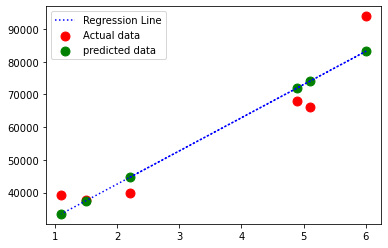

In [22]:
plt.scatter(x_train,y_train,color='red',label='Actual data',s=80)
plt.scatter(x_train,model.predict(x_train),color='green',label='predicted data',s=80)
plt.plot(x_train,model.predict(x_train),color='blue',label='Regression Line',ls='dotted')
plt.legend()
plt.show()


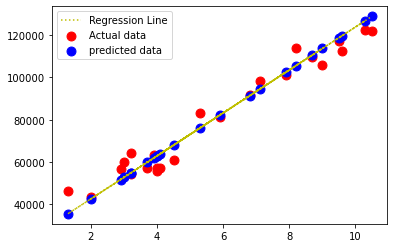

In [23]:
plt.scatter(x_test,y_test,color='red',label='Actual data',s=80)
plt.scatter(x_test,model.predict(x_test),color='b',label='predicted data',s=80)
plt.plot(x_test,model.predict(x_test),color='y',label='Regression Line',ls='dotted')
plt.legend()
plt.show()


In [24]:
accuracy=[]

for i in range(10000):
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,train_size = 0.80,random_state = i)
    model1=LinearRegression()
    model1.fit(x_train1,y_train1)
    ypred1=model1.predict(x_test1)
    score1 = r2_score(y_test1,ypred1)
    accuracy.append(score1)

In [25]:
np.max(accuracy)

0.99842716176972

In [26]:
np.argmax(accuracy)

9014

In [27]:
m=model.coef_
c=model.fit_intercept
print(m,c)

[10145.34063625] True


In [29]:
model.predict([[7]])

array([93325.53691477])